<a href="https://colab.research.google.com/github/vaibhav7766/NLP_lab/blob/main/Assignment_1/news_article_classification_nlp_models.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1 style="text-align: center;">News Article Classification Text Preprocessing and NLP models </h1>

Name: Vaibhav Sharma  
Batch: 2022-26  
Branch: AIML B2  
PRN: 22070126125

## DESCRIPTION OF THE DATASET

The AG's news topic classification dataset is constructed by choosing 4 largest classes from the original corpus. Each class contains 30,000 training samples and 1,900 testing samples. The total number of training samples is 120,000 and testing 7,600.

The file classes.txt contains a list of classes corresponding to each label.

The files train.csv and test.csv contain all the training samples as comma-sparated values. There are 3 columns in them, corresponding to class index (1 to 4), title and description. The title and description are escaped using double quotes ("), and any internal double quote is escaped by 2 double quotes (""). New lines are escaped by a backslash followed with an "n" character, that is "\n".

# Classification of News Articles

It is a notebook for classification of News articles which are having classes numbered 1 to 4,

1 is "World News",

2 is "Sports News",

3 is "Business News" and

4 is "Science-Technology News".

## Step 1: Import necessary libraries

In [ ]:
import numpy as np
import pandas as pd
import nltk
import string as s
from nltk.corpus import stopwords
import seaborn as sns
import re
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\vaibh\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

## Step 2: Load your dataset

In [ ]:
# Due to large amount of data , not able to run KNN so. ie limited resorces, more memory required
# Specify the number of rows you want to read
# num_rows_to_read = 60000  # Replace this with the desired number of rows

# Read only the specified number of rows
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [ ]:
train.head()

,Class Index,Title,Description
0,3,Wall St. Bears Claw Back Into the Black (Reuters),"Reuters - Short-sellers, Wall Street's dwindli..."
1,3,Carlyle Looks Toward Commercial Aerospace (Reu...,Reuters - Private investment firm Carlyle Grou...
2,3,Oil and Economy Cloud Stocks' Outlook (Reuters),Reuters - Soaring crude prices plus worries\ab...
3,3,Iraq Halts Oil Exports from Main Southern Pipe...,Reuters - Authorities have halted oil export\f...
4,3,"Oil prices soar to all-time record, posing new...","AFP - Tearaway world oil prices, toppling reco..."


In [ ]:
test.head()

,Class Index,Title,Description
0,3,Fears for T N pension after talks,Unions representing workers at Turner Newall...
1,4,The Race is On: Second Private Team Sets Launc...,"SPACE.com - TORONTO, Canada -- A second\team o..."
2,4,Ky. Company Wins Grant to Study Peptides (AP),AP - A company founded by a chemistry research...
3,4,Prediction Unit Helps Forecast Wildfires (AP),AP - It's barely dawn when Mike Fitzpatrick st...
4,4,Calif. Aims to Limit Farm-Related Smog (AP),AP - Southern California's smog-fighting agenc...


In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120000 entries, 0 to 119999
Data columns (total 3 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   Class Index  120000 non-null  int64 
 1   Title        120000 non-null  object
 2   Description  120000 non-null  object
dtypes: int64(1), object(2)
memory usage: 2.7+ MB


In [ ]:
print(train.shape)
print(test.shape)

(120000, 3)
(7600, 3)


### Spliting data into input and label

In [ ]:
train_x = train.Description
test_x = test.Description

train_y =  train['Class Index']
test_y = test['Class Index']

## Step 3: Preprocessing the dataset

### Removal of HTML Tag

In [ ]:
def striphtml(data):
    p = re.compile(r'<.*?>')
    return p.sub('', data)

In [ ]:
train_x = train_x.apply(striphtml)
test_x = test_x.apply(striphtml)

### Removal of URL

In [ ]:
def remove_url(data):
    return  re.sub(r'\s*(?:https?://)?www\.\S*\.[A-Za-z]{2,5}\s*', ' ', data).strip()

In [ ]:
train_x = train_x.apply(remove_url)
test_x = test_x.apply(remove_url)

### Tokenization of Data

In [ ]:
def word_tok(data):
    tokens = re.findall("[\w']+", data)
    return tokens

<>:4: SyntaxWarning: invalid escape sequence '\w'
<>:4: SyntaxWarning: invalid escape sequence '\w'
C:\Users\vaibh\AppData\Local\Temp\ipykernel_18984\882723685.py:4: SyntaxWarning: invalid escape sequence '\w'
  tokens = re.findall("[\w']+", data)


In [ ]:
train_x = train_x.apply(word_tok)
test_x =test_x.apply(word_tok)

### Removal of stopwords

In [ ]:
def remove_stopwords(data):
    stopWords = stopwords.words('english')
    new_list = []
    for i in data:
        if i.lower() not in stopWords:
            new_list.append(i)
    return new_list

In [ ]:
train_x = train_x.apply(remove_stopwords)
test_x = test_x.apply(remove_stopwords)

### Removal of Punctuation Symbols

In [ ]:
def remove_punctuations(data):
    new_list = []
    for i in data:
        for j in s.punctuation:
            i = i.replace(j,'')
        new_list.append(i)
    return new_list

In [ ]:
train_x = train_x.apply(remove_punctuations)
test_x = test_x.apply(remove_punctuations)

### Removal of numbers

In [ ]:
def remove_number(data):
    no_digit_list = []
    new_list = []

    for i in data:
        for j in s.digits:
            i = i.replace(j,'')
        no_digit_list.append(i)

    for i in no_digit_list:
        if i!='':
            new_list.append(i)
    return new_list

In [ ]:
train_x = train_x.apply(remove_number)
test_x = test_x.apply(remove_number)

### Stemming of dataset

In [ ]:
import nltk

def stemming(data):
    porter_stemmer = nltk.PorterStemmer()
    roots = [porter_stemmer.stem(i) for i in data]
    return roots

In [ ]:
train_x = train_x.apply(stemming)
test_x = test_x.apply(stemming)

### Lemmatization of data


In [ ]:
def lemmatization(data):
    lemmatizer = nltk.stem.WordNetLemmatizer()
    roots = [lemmatizer.lemmatize(i) for i in data]
    return roots

In [ ]:
train_x = train_x.apply(lemmatization)
test_x = test_x.apply(lemmatization)

### Remove extra words

In [ ]:
def remove_extraWords(data):
    extra_words =['href','iii','lt','gt','ii','com','quot']

    new_list = []
    for i in data:
        if i not in extra_words:
            new_list.append(i)
    return new_list

In [ ]:
train_x = train_x.apply(remove_extraWords)
test_x = test_x.apply(remove_extraWords)

In [ ]:
train_x = [" ".join(map(str, lst)) for lst in train_x]
test_x = [" ".join(map(str, lst)) for lst in test_x]

## Step 4: Feature Extraction

In [ ]:
# Vectorization with CountVectorizer
count_vect = CountVectorizer(min_df=8, ngram_range=(1, 3))
train_count = count_vect.fit_transform(train_x)
test_count = count_vect.transform(test_x)

In [ ]:
# Vectorization with TfidfVectorizer
tfidf_vect = TfidfVectorizer(min_df=8, ngram_range=(1, 3))
train_tfidf = tfidf_vect.fit_transform(train_x)
test_tfidf = tfidf_vect.transform(test_x)

## Step 5: Train and Evaluate the models

In [ ]:
# Function to train and evaluate models
def train_and_evaluate_model(model, train_data, test_data, model_name):
    model.fit(train_data, train_y)
    predictions = model.predict(test_data)
    accuracy = accuracy_score(test_y, predictions)
    print(f"{model_name} Accuracy: {accuracy}")
    print("Classification Report:")
    print(classification_report(test_y, predictions))
    print("Confusion Matrix:")
    print(confusion_matrix(test_y, predictions))
    sns.heatmap(confusion_matrix(test_y, predictions), cmap="Blues", annot=True)

Logistic Regression with CountVectorizer
Logistic Regression with CountVectorizer Accuracy: 0.9035526315789474
Classification Report:
              precision    recall  f1-score   support

           1       0.92      0.90      0.91      1900
           2       0.95      0.96      0.96      1900
           3       0.87      0.86      0.87      1900
           4       0.87      0.89      0.88      1900

    accuracy                           0.90      7600
   macro avg       0.90      0.90      0.90      7600
weighted avg       0.90      0.90      0.90      7600

Confusion Matrix:
[[1715   59   74   52]
 [  34 1833   17   16]
 [  72   22 1632  174]
 [  53   16  144 1687]]


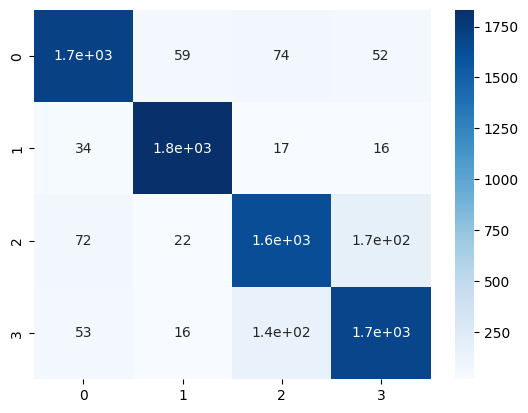

In [ ]:
# Logistic Regression
lr = LogisticRegression(max_iter=200)
print("Logistic Regression with CountVectorizer")
train_and_evaluate_model(
    lr, train_count, test_count, "Logistic Regression with CountVectorizer"
)


Logistic Regression with TfidfVectorizer
Logistic Regression with TfidfVectorizer Accuracy: 0.9090789473684211
Classification Report:
              precision    recall  f1-score   support

           1       0.93      0.90      0.91      1900
           2       0.94      0.97      0.96      1900
           3       0.88      0.88      0.88      1900
           4       0.89      0.89      0.89      1900

    accuracy                           0.91      7600
   macro avg       0.91      0.91      0.91      7600
weighted avg       0.91      0.91      0.91      7600

Confusion Matrix:
[[1709   65   78   48]
 [  21 1850   15   14]
 [  57   23 1666  154]
 [  55   22  139 1684]]


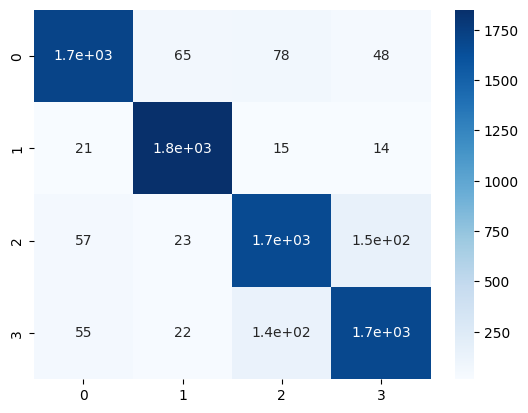

In [ ]:
print("Logistic Regression with TfidfVectorizer")
train_and_evaluate_model(
    lr, train_tfidf, test_tfidf, "Logistic Regression with TfidfVectorizer"
)

# Support Vector Classifier (SVC)


SVC with CountVectorizer
SVC with CountVectorizer Accuracy: 0.9096052631578947
Classification Report:
              precision    recall  f1-score   support

           1       0.93      0.90      0.91      1900
           2       0.95      0.97      0.96      1900
           3       0.88      0.87      0.88      1900
           4       0.88      0.89      0.89      1900

    accuracy                           0.91      7600
   macro avg       0.91      0.91      0.91      7600
weighted avg       0.91      0.91      0.91      7600

Confusion Matrix:
[[1706   60   78   56]
 [  22 1852   12   14]
 [  58   19 1659  164]
 [  56   19  129 1696]]


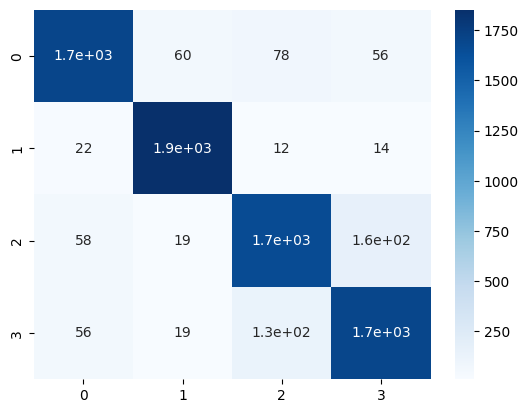

In [ ]:
svc = SVC()
print("SVC with CountVectorizer")
train_and_evaluate_model(svc, train_count, test_count, "SVC with CountVectorizer")


SVC with TfidfVectorizer
SVC with TfidfVectorizer Accuracy: 0.9132894736842105
Classification Report:
              precision    recall  f1-score   support

           1       0.93      0.90      0.92      1900
           2       0.95      0.98      0.96      1900
           3       0.89      0.88      0.88      1900
           4       0.88      0.90      0.89      1900

    accuracy                           0.91      7600
   macro avg       0.91      0.91      0.91      7600
weighted avg       0.91      0.91      0.91      7600

Confusion Matrix:
[[1708   61   79   52]
 [  17 1860   10   13]
 [  52   16 1667  165]
 [  53   18  123 1706]]


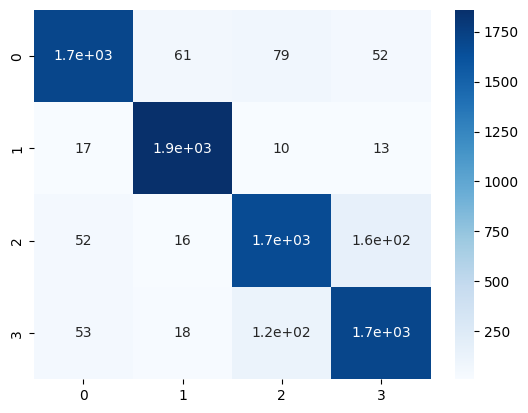

In [ ]:
print("SVC with TfidfVectorizer")
train_and_evaluate_model(svc, train_tfidf, test_tfidf, "SVC with TfidfVectorizer")

# Random Forest

Random Forest with CountVectorizer
Random Forest with CountVectorizer Accuracy: 0.8914473684210527
Classification Report:
              precision    recall  f1-score   support

           1       0.91      0.89      0.90      1900
           2       0.93      0.97      0.95      1900
           3       0.87      0.84      0.85      1900
           4       0.86      0.86      0.86      1900

    accuracy                           0.89      7600
   macro avg       0.89      0.89      0.89      7600
weighted avg       0.89      0.89      0.89      7600

Confusion Matrix:
[[1694   66   81   59]
 [  22 1846   14   18]
 [  71   36 1593  200]
 [  77   38  143 1642]]


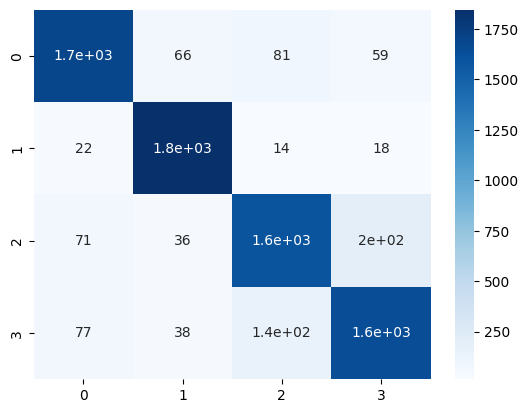

In [ ]:
rf = RandomForestClassifier(n_estimators=100, random_state=42)
print("Random Forest with CountVectorizer")
train_and_evaluate_model(
    rf, train_count, test_count, "Random Forest with CountVectorizer"
)


Random Forest with TfidfVectorizer
Random Forest with TfidfVectorizer Accuracy: 0.8863157894736842
Classification Report:
              precision    recall  f1-score   support

           1       0.90      0.89      0.90      1900
           2       0.92      0.97      0.94      1900
           3       0.86      0.83      0.84      1900
           4       0.86      0.86      0.86      1900

    accuracy                           0.89      7600
   macro avg       0.89      0.89      0.89      7600
weighted avg       0.89      0.89      0.89      7600

Confusion Matrix:
[[1686   74   89   51]
 [  24 1840   18   18]
 [  79   42 1581  198]
 [  74   40  157 1629]]


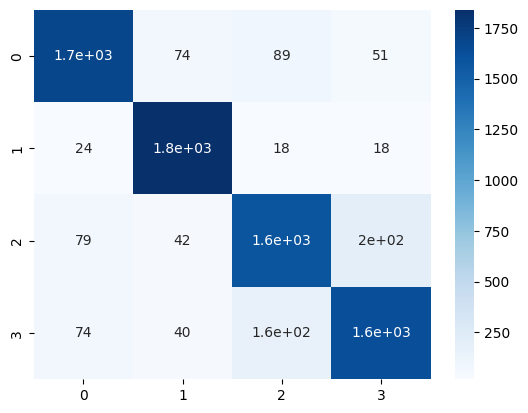

In [ ]:
print("\nRandom Forest with TfidfVectorizer")
train_and_evaluate_model(
    rf, train_tfidf, test_tfidf, "Random Forest with TfidfVectorizer"
)

In [7]:
!jupyter nbconvert --to pdf "/content/NLP Assignment 1 - News Article Classification.ipynb"

[NbConvertApp] Converting notebook /content/NLP Assignment 1 - News Article Classification.ipynb to pdf
[NbConvertApp] Support files will be in NLP Assignment 1 - News Article Classification_files/
[NbConvertApp] Making directory ./NLP Assignment 1 - News Article Classification_files
[NbConvertApp] Making directory ./NLP Assignment 1 - News Article Classification_files
[NbConvertApp] Making directory ./NLP Assignment 1 - News Article Classification_files
[NbConvertApp] Making directory ./NLP Assignment 1 - News Article Classification_files
[NbConvertApp] Making directory ./NLP Assignment 1 - News Article Classification_files
[NbConvertApp] Making directory ./NLP Assignment 1 - News Article Classification_files
[NbConvertApp] Writing 56056 bytes to notebook.tex
[NbConvertApp] Building PDF
[NbConvertApp] Running xelatex 3 times: ['xelatex', 'notebook.tex', '-quiet']
[NbConvertApp] Running bibtex 1 time: ['bibtex', 'notebook']
[NbConvertApp] WARNING | bibtex had problems, most likely beca